#### In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data. 

In [17]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs

#### a. Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. 

In [2]:
# generate 50d classification dataset, Each observation has 50 inputs and 0, 1, or 2 class values.
X, labels = make_blobs(n_samples=60, centers=3, cluster_std = 12, n_features=50,random_state = 222)
print(np.shape(X))
print(np.shape(labels))

(60, 50)
(60,)


#### b. Perform PCA on the 60 observations and plot the first two prin- cipal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors. Make sure there is also some overlap between the classes! 

In [3]:
pca = PCA(2)
pca.fit(X)
X_PCA = pca.transform(X)

x, y = X_PCA[:, 0], X_PCA[:, 1]
df = pd.DataFrame({'x': x, 'y':y, 'label':labels+1}) 

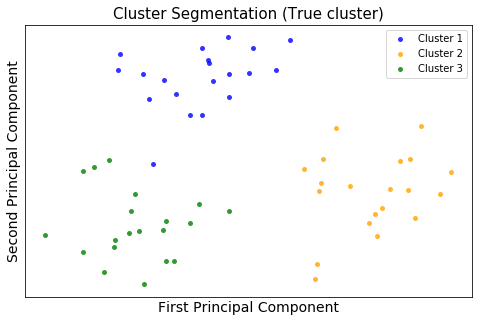

In [4]:
import warnings
warnings.simplefilter('ignore')

cdict={1: 'blue',
       2: 'orange',
       3: 'green',
       4: 'r'
      }
labl={1: 'Cluster 1',
      2: 'Cluster 2',
      3: 'Cluster 3',
      4: 'Cluster 4'}

fig,ax=plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('white')
groups = df.groupby('label')
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=cdict[name],label=labl[name], mec='none',alpha=0.8)
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis='y',which='both',left='off',top='off',labelleft='off')
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.title("Cluster Segmentation (True cluster)",fontsize=15)
plt.show()

#### c. Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? 

In [5]:
#Fitting KMeans to dataset and pick UP 3 category
kmean= KMeans(3,init = 'k-means++', random_state = 101)
kmean.fit(X)
labels_kmean=kmean.predict(X)

In [19]:
df_kmean = pd.DataFrame({'x': x, 'y':y, 'label_true':labels,'label_kmean':labels_kmean}) 

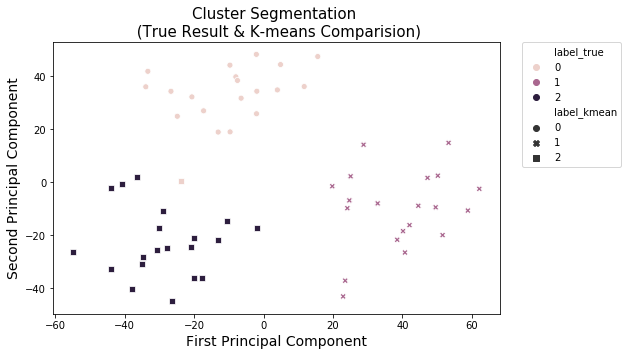

In [22]:
fig,ax=plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('white')
sns.scatterplot(x="x", y="y",hue="label_true",style="label_kmean",data=df_kmean)
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Cluster Segmentation \n (True Result & K-means Comparision)",fontsize=15)
plt.show()

In [29]:
pd.crosstab(df_kmean['label_true'],df_kmean['label_kmean']) 

label_kmean,0,1,2
label_true,,,
0,19,0,1
1,0,20,0
2,0,0,20


The clusters that I obtained in K-means clustering is almost the same as the true class labels, except one cluster 0 is classified as cluster 2 by k-means due to one square is pink other than black.

#### d. Perform K-means clustering with K = 2. Describe your results. 

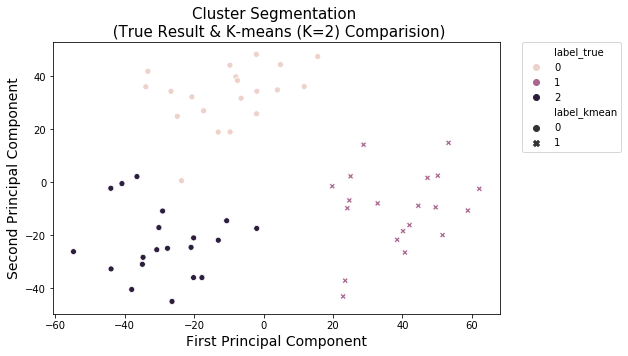

In [30]:
#Fitting KMeans to dataset and pick UP 2 category
kmean= KMeans(2,init = 'k-means++', random_state = 101)
kmean.fit(X)
labels_kmean=kmean.labels_

#Made dataframe
df_kmean = pd.DataFrame({'x': x, 'y':y, 'label_true':labels,'label_kmean':labels_kmean}) 
#plot
fig,ax=plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('white')
sns.scatterplot(x="x", y="y",hue="label_true",style="label_kmean",data=df_kmean)
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Cluster Segmentation \n (True Result & K-means (K=2) Comparision)",fontsize=15)
plt.show()

In [31]:
pd.crosstab(df_kmean['label_true'],df_kmean['label_kmean']) 

label_kmean,0,1
label_true,,
0,20,0
1,0,20
2,20,0


The cluster 0 and cluster 2 are combined as one group in terms of K-means. The cluster 1 is exactly right clustered as one group as we can see all dark pink is '×' maker.

#### e. Now perform K-means clustering with K = 4, and describe your results. 

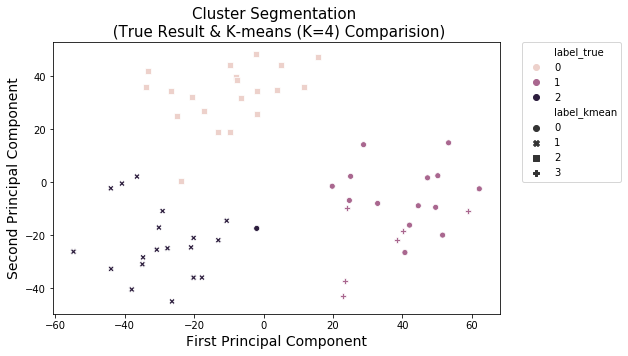

In [32]:
#Fitting KMeans to dataset and pick up 4 category
kmean= KMeans(4,init = 'k-means++', random_state = 101)
kmean.fit(X)
labels_kmean=kmean.labels_

#Made dataframe
df_kmean = pd.DataFrame({'x': x, 'y':y, 'label_true':labels,'label_kmean':labels_kmean}) 
#plot
fig,ax=plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('white')
sns.scatterplot(x="x", y="y",hue="label_true",style="label_kmean",data=df_kmean)
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Cluster Segmentation \n (True Result & K-means (K=4) Comparision)",fontsize=15)
plt.show()

In [33]:
pd.crosstab(df_kmean['label_true'],df_kmean['label_kmean']) 

label_kmean,0,1,2,3
label_true,,,,
0,0,0,20,0
1,14,0,0,6
2,1,19,0,0


The cluster 1 is split into two categories by K-means way, one for 14 subjects and one for 6 subjects. As for cluster 2, one object is wrongly classified as the 14-subjects group as usual.

#### f. Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results. 

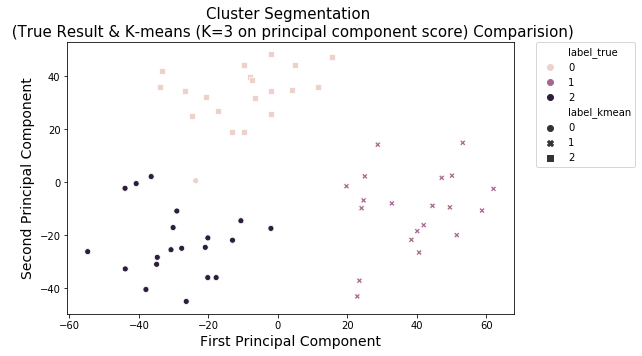

In [34]:
#Fitting KMeans to dataset and pick up 3 category
kmean= KMeans(3,init = 'k-means++', random_state = 101)
#k-means on principal component score vector
kmean.fit(X_PCA)
labels_kmean=kmean.labels_

#Made dataframe
df_kmean = pd.DataFrame({'x': x, 'y':y, 'label_true':labels,'label_kmean':labels_kmean}) 
#plot
fig,ax=plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('white')
sns.scatterplot(x="x", y="y",hue="label_true",style="label_kmean",data=df_kmean)
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Cluster Segmentation \n (True Result & K-means (K=3 on principal component score) Comparision)",fontsize=15)
plt.show()

In [35]:
pd.crosstab(df_kmean['label_true'],df_kmean['label_kmean']) 

label_kmean,0,1,2
label_true,,,
0,1,0,19
1,0,20,0
2,20,0,0


The clustering result is exactly the same as the clusters created by applying kmeans method on raw data. One object is wrongly classified.

#### g. Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (c)? Explain. 

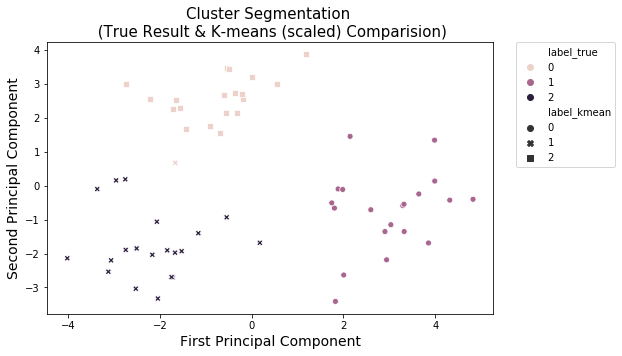

In [40]:
# Normalizing input values
scale = StandardScaler()
scale.fit(X)
X_scale = scale.fit_transform(X)

#Fitting KMeans to scale data and cluster into 3 categories
kmean= KMeans(3,init = 'k-means++', random_state = 101)
kmean.fit(X_scale)
labels_kmean=kmean.predict(X_scale)

pca = PCA(2)
pca.fit(X_scale)
X_PCA = pca.transform(X_scale)

x, y = X_PCA[:, 0], X_PCA[:, 1]
df_kmean = pd.DataFrame({'x': x, 'y':y, 'label_true':labels,'label_kmean':labels_kmean}) 

#plot
fig,ax=plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('white')
sns.scatterplot(x="x", y="y",hue="label_true",style="label_kmean",data=df_kmean)
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Cluster Segmentation \n (True Result & K-means (scaled) Comparision)",fontsize=15)
plt.show()

In [41]:
pd.crosstab(df_kmean['label_true'],df_kmean['label_kmean']) 

label_kmean,0,1,2
label_true,,,
0,0,1,19
1,20,0,0
2,0,20,0


The clustering result is exactly the same as the clusters created by applying kmeans method on raw data. Only one object is wrongly classified. This is because the raw data already have similar mean and standard error even before scaling. Each variable contribute pretty much for distance caculation when apply K-means. 

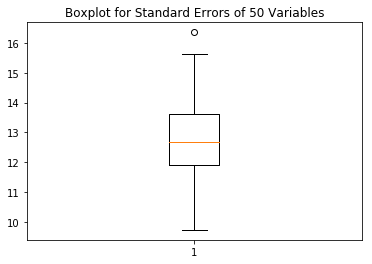

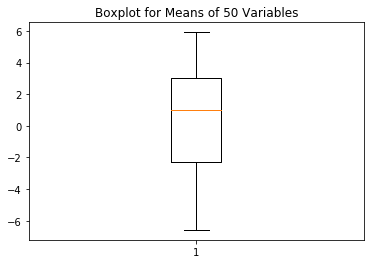

In [21]:
standarderror=X.std(axis=0)
plt.boxplot(standarderror)
plt.title("Boxplot for Standard Errors of 50 Variables")
plt.show()
avg=X.mean(axis=0)
plt.boxplot(avg)
plt.title("Boxplot for Means of 50 Variables")
plt.show()